In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\archive (11)\crime.csv',encoding='latin-1')
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [5]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:

data = data.loc[data['YEAR'].isin([2016,2017])]


data = data.loc[data['UCR_PART'] == 'Part One']

# Remove unused columns
data = data.drop(['INCIDENT_NUMBER','OFFENSE_CODE','UCR_PART','Location'], axis=1)

# Convert OCCURED_ON_DATE to datetime
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

# Fill in nans in SHOOTING column
data.SHOOTING.fillna('N', inplace=True)

# Convert DAY_OF_WEEK to an ordered category
data.DAY_OF_WEEK = pd.Categorical(data.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

# Replace -1 values in Lat/Long with Nan
data.Lat.replace(-1, None, inplace=True)
data.Long.replace(-1, None, inplace=True)

# Rename columns to something easier to type (the all-caps are annoying!)
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
data.rename(index=str, columns=rename, inplace=True)

data.head()

,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,Street,Lat,Long
5633,Larceny,LARCENY THEFT FROM BUILDING,E5,729,N,2017-10-23 13:58:00,2017,10,Monday,13,VFW PKWY,42.28537,-71.17244
5919,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,N,2017-03-22 09:00:00,2017,3,Wednesday,9,AUSTIN ST,42.257688,-71.126418
6940,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,N,2017-03-23 12:00:00,2017,3,Thursday,12,COMMONWEALTH AVE,42.338363,-71.15441
12370,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,N,2017-11-21 21:00:00,2017,11,Tuesday,21,SYLVIA ST,42.310559,-71.102854
14227,Larceny,LARCENY THEFT FROM BUILDING,D4,136,N,2017-12-15 16:06:00,2017,12,Friday,16,MARLBOROUGH ST,42.352569,-71.079788


In [7]:
data.shape

(37538, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37538 entries, 5633 to 319052
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Group        37538 non-null  object        
 1   Description  37538 non-null  object        
 2   District     37405 non-null  object        
 3   Area         37538 non-null  object        
 4   Shooting     37538 non-null  object        
 5   Date         37538 non-null  datetime64[ns]
 6   Year         37538 non-null  int64         
 7   Month        37538 non-null  int64         
 8   Day          37538 non-null  category      
 9   Hour         37538 non-null  int64         
 10  Street       36519 non-null  object        
 11  Lat          35742 non-null  object        
 12  Long         35742 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(3), object(8)
memory usage: 3.8+ MB


In [9]:
data.describe()
data.isnull().sum()

Group             0
Description       0
District        133
Area              0
Shooting          0
Date              0
Year              0
Month             0
Day               0
Hour              0
Street         1019
Lat            1796
Long           1796
dtype: int64

## types of serious crimes


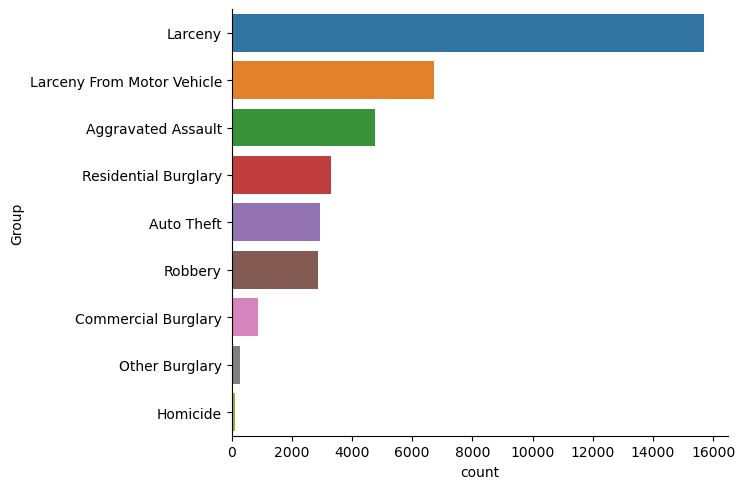

In [13]:
sns.catplot(y='Group',
           kind='count',
            height=5, 
            aspect=1.5,
            order=data.Group.value_counts().index,
           data=data)

**Most commom serious crime is larceny
**homicides are pretty rare

## when do crime usually occurs
**based on hours of the day, days of the week, and months of the year.

Text(-3.930555555555534, 0.5, 'Count')

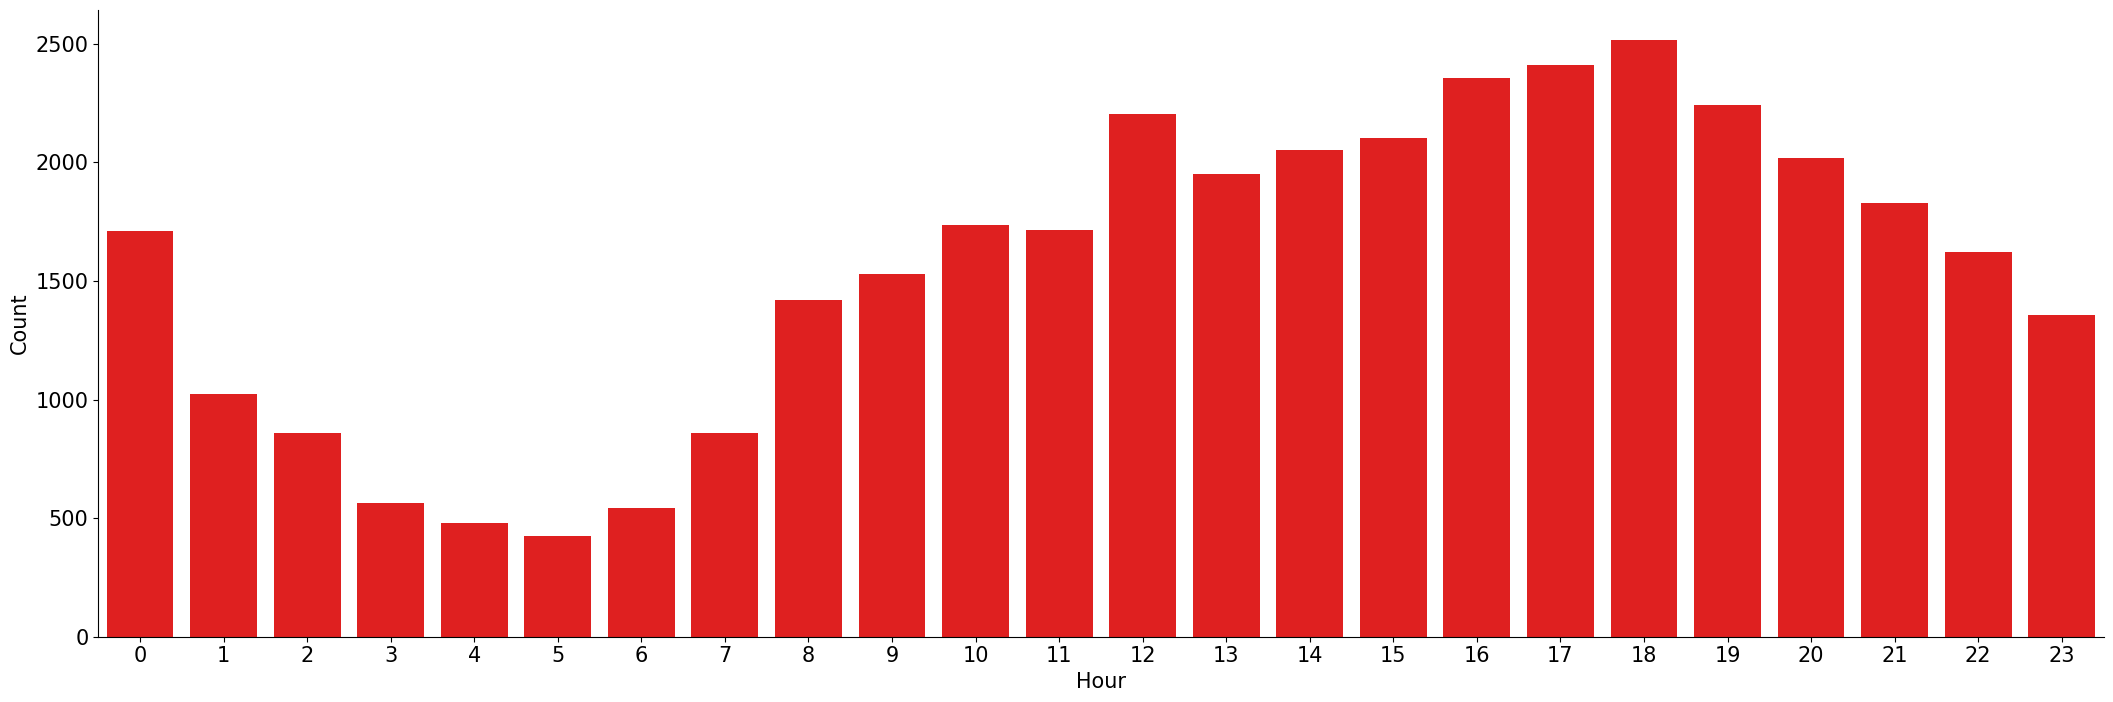

In [17]:
# Crimes by hour of the day
sns.catplot(x='Hour',
           kind='count',
            height=7, 
            aspect=3,
            color='red',
           data=data)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Count', fontsize=15)

*crime rates are low between 1-8 morning and gradually rise throughout the day, peaking around 6 pm


Text(-3.9305555555555483, 0.5, 'Count')

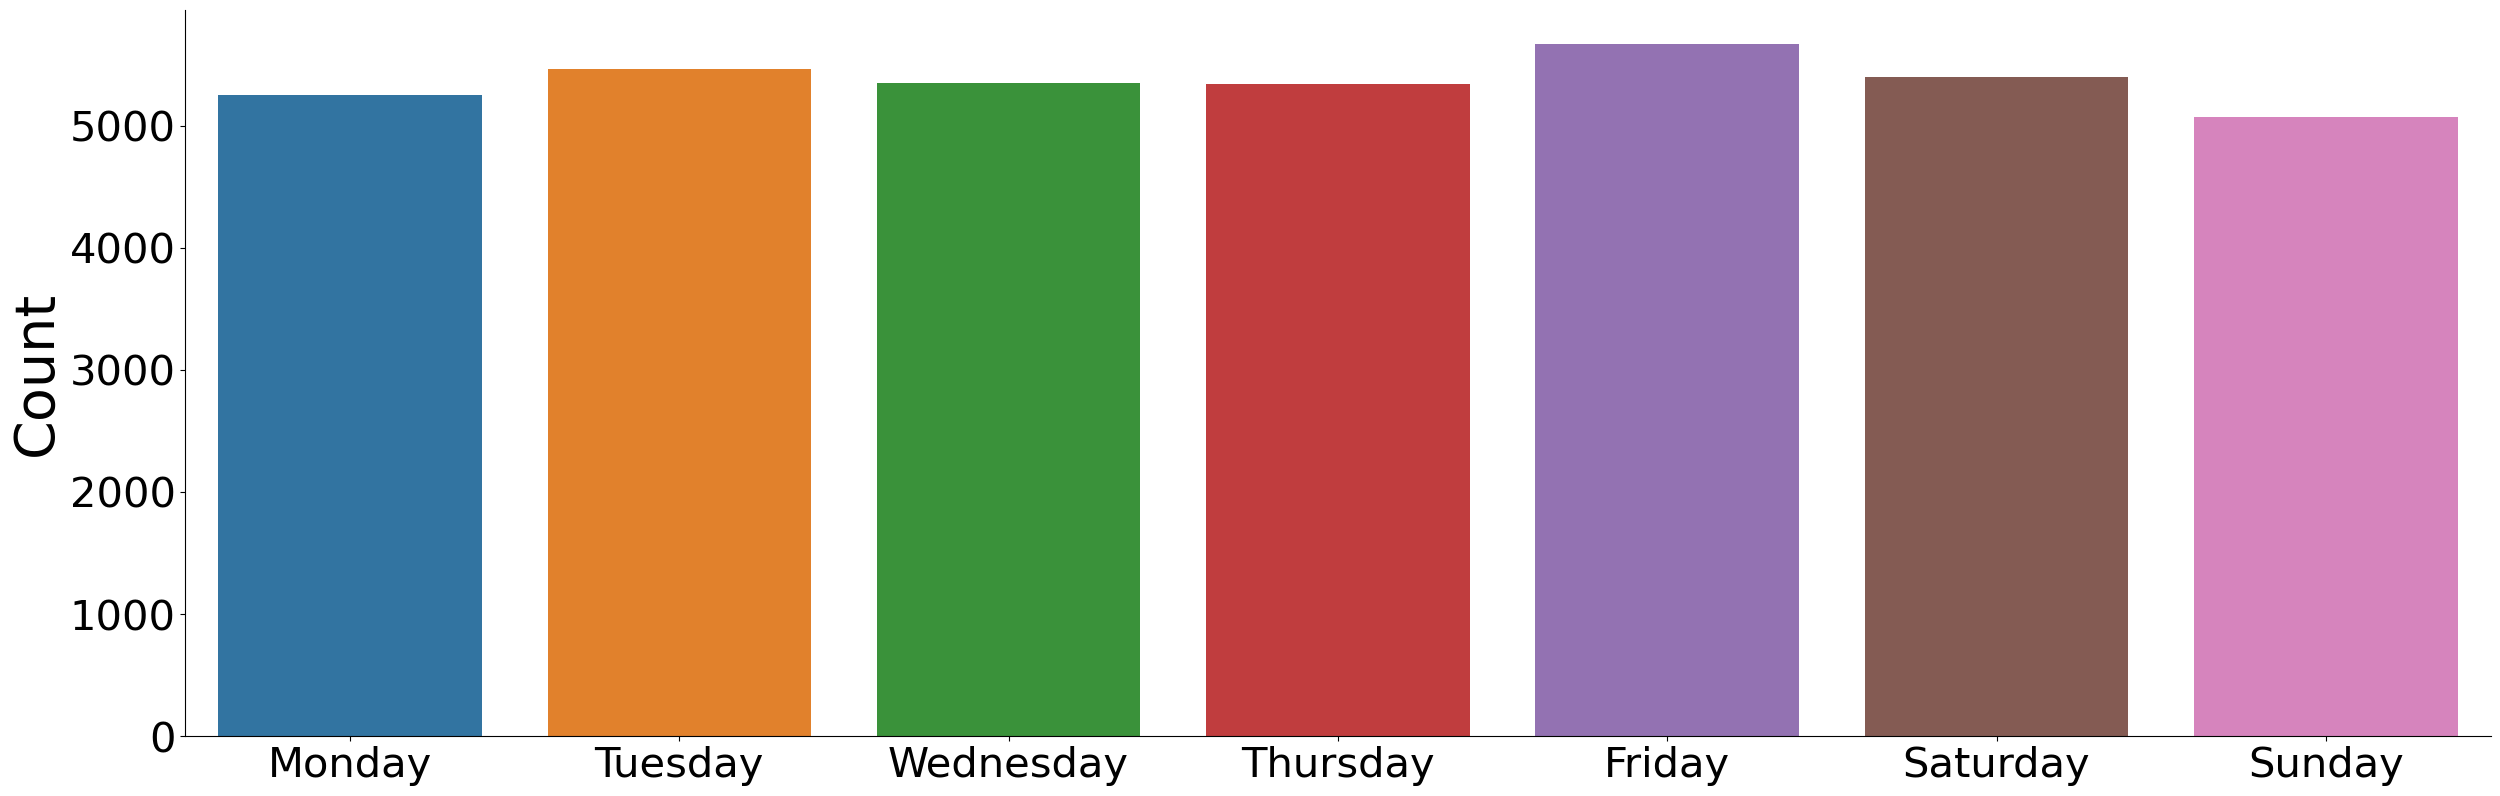

In [18]:
# Crimes by day of the week
sns.catplot(x='Day',
           kind='count',
            height=8, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

with Friday having the highest crime rate and Sunday having the lowest. *

Text(-3.9305555555555483, 0.5, 'Count')

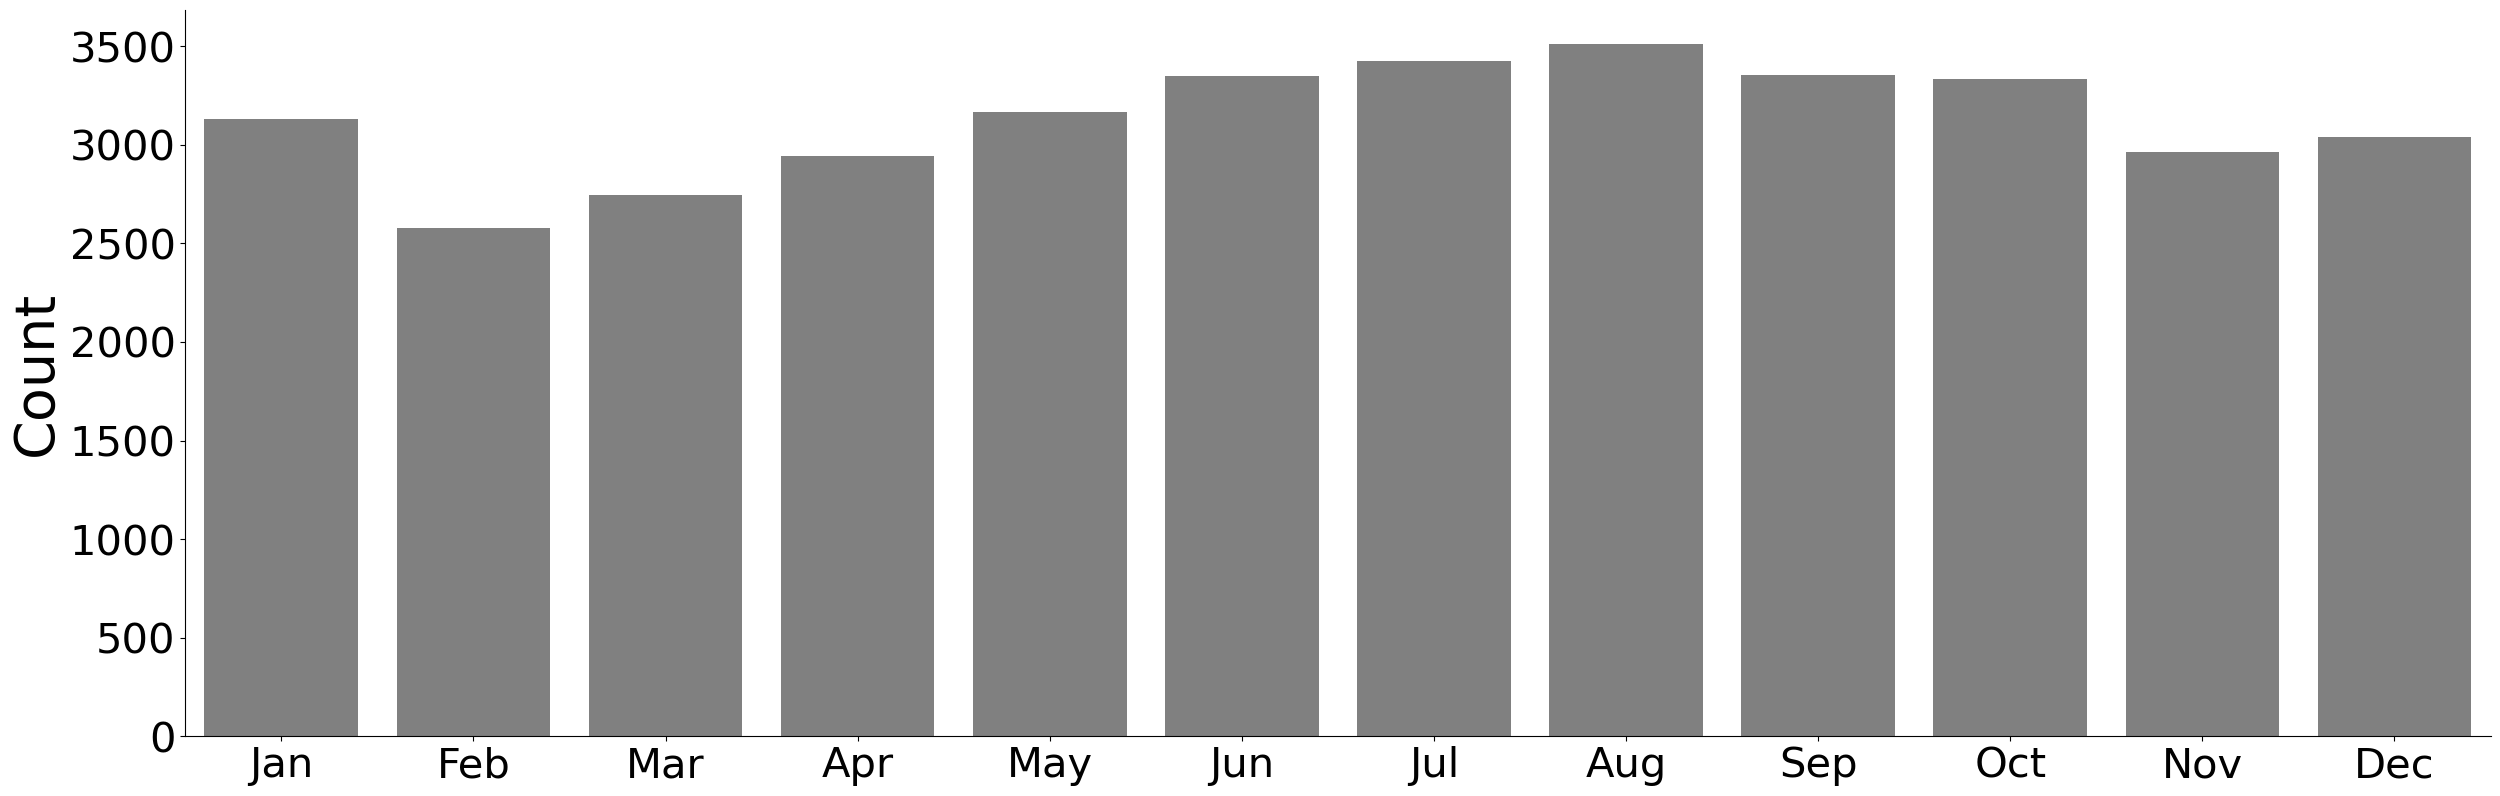

In [22]:
# Crimes by month of year
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',
           kind='count',
            height=8, 
            aspect=3,
            color='gray',
           data=data)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

*the winter months of February-April having the lowest crime rates, and the months of June-October having the highest crime rates. There is also a spike in crime rates in the month of January.

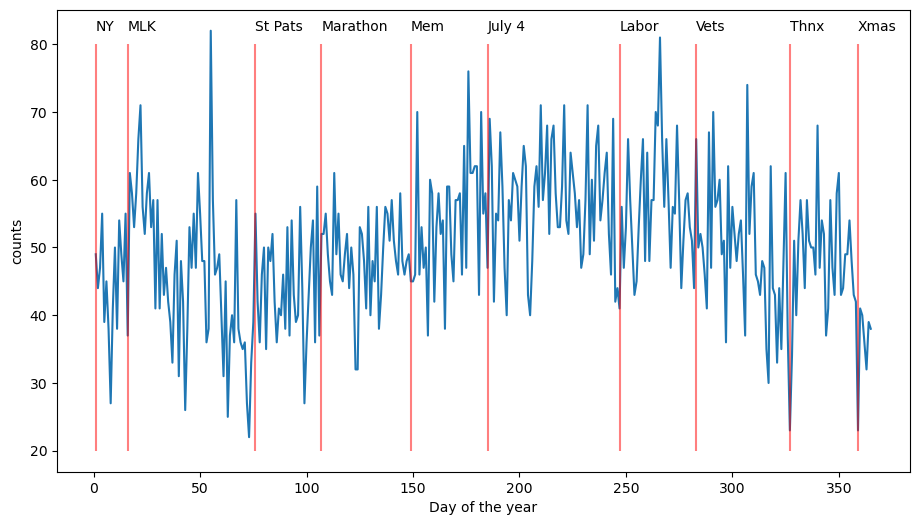

In [23]:

data['Day_of_year'] = data.Date.dt.dayofyear
data_holidays = data[data.Year == 2017].groupby(['Day_of_year']).size().reset_index(name='counts')

# Dates of major U.S. holidays in 2017
holidays = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']

import datetime as dt
# Plot crimes and holidays
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            data=data_holidays)
plt.xlabel('Day of the year')
plt.vlines(holidays, 20, 80, alpha=0.5, color ='r')
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=82, s=holidays_names[i])

## where do crimes usually occurs

<Axes: xlabel='Lat', ylabel='Long'>

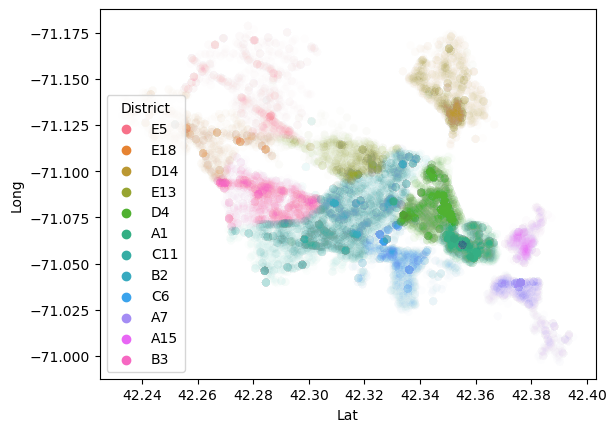

In [25]:
sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.01,
               data=data)

**We can now associate high crime rates with particular districts, most noteably A1 and D4, . There is also a very high crime region visibe in district D14.

**conclusion**
Larceny is the most common type of serious crime.
Serious crimes are most likely to occur in the afternoon and evening.
Serious crimes are most likely to occur on Friday and least likely to occur on Sunday.
Serious crimes are most likely to occur in the summer and early fall, and least likely to occur in the winter
There is no obvious connection between major holidays and crime rates.
Serious crimes are most common in the city center, especially districts A1 and D4.
